In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
import tensorflow as tf

In [3]:
data = pd.read_excel("2019-2021 statewise crime rate.xlsx")
data.head()

,State/UT,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021)
0,Andhra Pradesh,119229,188997,179611,528.5,339.9,92.9
1,Arunachal Pradesh,2590,2244,2626,15.4,170.9,51.7
2,Assam,123512,111558,119883,351.6,341.0,38.2
3,Bihar,197935,194698,186006,1237.0,150.4,70.5
4,Chhattisgarh,61256,65216,70519,296.1,238.2,80.2


In [4]:
data["IPC Crimes - 2019"] = pd.to_numeric(data["IPC Crimes - 2019"])

In [5]:
pd.api.types.is_string_dtype(data["State/UT"])

True

In [6]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State/UT


In [7]:
# This will convert all strings to category
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [8]:
data['StateCodes'] = data["State/UT"].cat.codes

In [9]:
data.head()

,State/UT,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021),StateCodes
0,Andhra Pradesh,119229,188997,179611,528.5,339.9,92.9,1
1,Arunachal Pradesh,2590,2244,2626,15.4,170.9,51.7,2
2,Assam,123512,111558,119883,351.6,341.0,38.2,3
3,Bihar,197935,194698,186006,1237.0,150.4,70.5,4
4,Chhattisgarh,61256,65216,70519,296.1,238.2,80.2,6


In [10]:
data.describe()

,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021),StateCodes
count,3.900000e+01,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000
mean,2.481228e+05,3.272582e+05,2.817969e+05,1051.679487,258.448718,68.776923,19.000000
std,6.722904e+05,9.083960e+05,7.682254e+05,2965.017384,239.159519,19.487263,11.401754
min,0.000000e+00,1.070000e+02,8.900000e+01,0.700000,44.200000,14.800000,0.000000
25%,2.824500e+03,2.727000e+03,2.555000e+03,18.900000,135.900000,59.850000,9.500000
50%,6.125600e+04,6.521600e+04,7.051900e+04,296.100000,198.100000,73.500000,19.000000
75%,1.719630e+05,1.939885e+05,2.002790e+05,685.350000,317.100000,80.500000,28.500000
max,3.225597e+06,4.254356e+06,3.663360e+06,13671.800000,1410.000000,95.900000,38.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   State/UT                                         39 non-null     category
 1   IPC Crimes - 2019                                39 non-null     int64   
 2   IPC Crimes - 2020                                39 non-null     int64   
 3   IPC Crimes - 2021                                39 non-null     int64   
 4   Mid-Year Projected Population (in Lakhs)
(2021)  39 non-null     float64 
 5   Rate of Cognizable Crimes (IPC) (2021)           39 non-null     float64 
 6   Chargesheeting Rate (2021)                       39 non-null     float64 
 7   StateCodes                                       39 non-null     int8    
dtypes: category(1), float64(3), int64(3), int8(1)
memory usage: 3.4 KB


In [12]:
data.isnull().sum()

State/UT                                            0
IPC Crimes - 2019                                   0
IPC Crimes - 2020                                   0
IPC Crimes - 2021                                   0
Mid-Year Projected Population (in Lakhs)\n(2021)    0
Rate of Cognizable Crimes (IPC) (2021)              0
Chargesheeting Rate (2021)                          0
StateCodes                                          0
dtype: int64

In [13]:
data.corr()

,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021),StateCodes
IPC Crimes - 2019,1.000000,0.990412,0.998886,0.993761,0.098785,0.053968,0.304623
IPC Crimes - 2020,0.990412,1.000000,0.995019,0.988185,0.082402,0.070103,0.310043
IPC Crimes - 2021,0.998886,0.995019,1.000000,0.994063,0.092966,0.065803,0.302988
Mid-Year Projected Population (in Lakhs)\n(2021),0.993761,0.988185,0.994063,1.000000,0.014509,0.094317,0.312477
Rate of Cognizable Crimes (IPC) (2021),0.098785,0.082402,0.092966,0.014509,1.000000,-0.260284,-0.054099
Chargesheeting Rate (2021),0.053968,0.070103,0.065803,0.094317,-0.260284,1.000000,-0.021947
StateCodes,0.304623,0.310043,0.302988,0.312477,-0.054099,-0.021947,1.000000


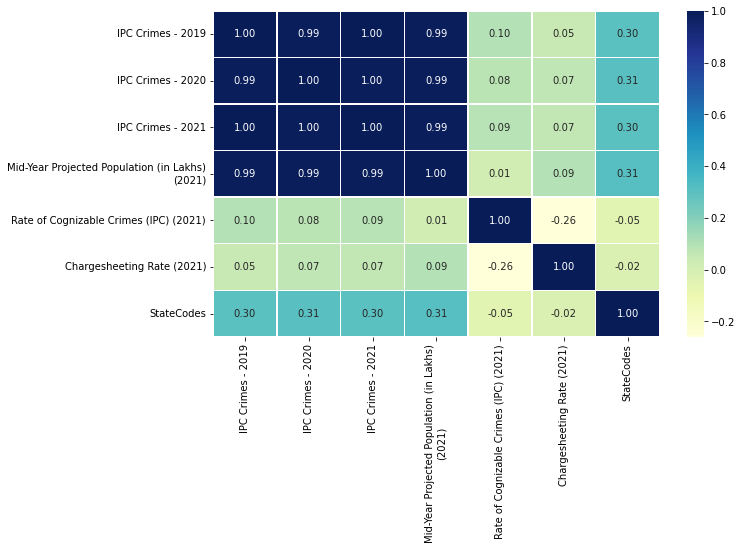

In [14]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

<AxesSubplot:>

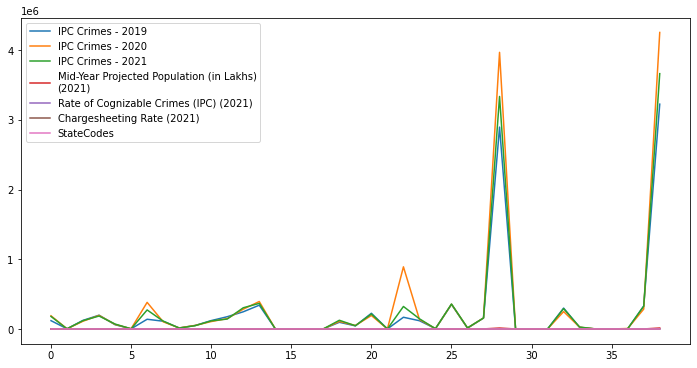

In [15]:
data.plot(figsize=(12,6))

### Modelling

In [16]:
data_temp = data.drop(columns=["State/UT"])
data_temp.head()

,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021),StateCodes
0,119229,188997,179611,528.5,339.9,92.9,1
1,2590,2244,2626,15.4,170.9,51.7,2
2,123512,111558,119883,351.6,341.0,38.2,3
3,197935,194698,186006,1237.0,150.4,70.5,4
4,61256,65216,70519,296.1,238.2,80.2,6


In [17]:
# variables for training
cols = list(data_temp)[0:7]

In [18]:
data_for_training = data_temp[cols].astype(float)
data_for_training

,IPC Crimes - 2019,IPC Crimes - 2020,IPC Crimes - 2021,Mid-Year Projected Population (in Lakhs)\n(2021),Rate of Cognizable Crimes (IPC) (2021),Chargesheeting Rate (2021),StateCodes
0,119229.0,188997.0,179611.0,528.5,339.9,92.9,1.0
1,2590.0,2244.0,2626.0,15.4,170.9,51.7,2.0
2,123512.0,111558.0,119883.0,351.6,341.0,38.2,3.0
3,197935.0,194698.0,186006.0,1237.0,150.4,70.5,4.0
4,61256.0,65216.0,70519.0,296.1,238.2,80.2,6.0
5,2465.0,3393.0,2099.0,15.6,134.5,73.5,9.0
6,139503.0,381849.0,273056.0,700.8,389.7,95.9,10.0
7,111323.0,103276.0,112720.0,296.0,380.8,49.1,11.0
8,14480.0,14803.0,13041.0,74.1,176.1,83.9,12.0
9,50048.0,51033.0,47684.0,386.4,123.4,67.5,14.0


In [19]:
scaler = StandardScaler()
scaler = scaler.fit(data_for_training)
data_for_training_scaled = scaler.transform(data_for_training)

In [20]:
trainX = []
trainY = []

n_future = 1        # No. of days we want to predict in future
n_past = 4          # No. of past days we want to use for predicting the future

In [21]:
for i in range(n_past, len(data_for_training_scaled) - n_future+1):
    trainX.append(data_for_training_scaled[i-n_past:i, 0:data_for_training.shape[1]])
    trainY.append(data_for_training_scaled[i+n_future-1:i+n_future,0])

trainX, trainY = np.array(trainX), np.array(trainY)

In [22]:
trainX.shape, trainY.shape

((35, 4, 7), (35, 1))

In [23]:
model = Sequential()
model.add(LSTM(64,activation='softmax',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dense(1))
model.add(Dropout(0.5))
model.add(LSTM(32,activation='softmax',return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(LSTM(32,activation='softmax',return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))


In [24]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 64)             18432     
                                                                 
 dense (Dense)               (None, 4, 1)              65        
                                                                 
 dropout (Dropout)           (None, 4, 1)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 32)             4352      
                                                                 
 dropout_1 (Dropout)         (None, 4, 32)             0         
                                                                 
 dense_1 (Dense)             (None, 4, 1)              33        
                                                                 
 lstm_2 (LSTM)               (None, 32)                4

In [25]:
history = model.fit(trainX, trainY,epochs=40, batch_size=7, validation_split=0.2,verbose=1)

Epoch 1/40
4/4 [==============================] - 2s 100ms/step - loss: 0.6430 - val_loss: 2.9684
Epoch 2/40
4/4 [==============================] - 0s 8ms/step - loss: 0.6418 - val_loss: 2.9707
Epoch 3/40
4/4 [==============================] - 0s 14ms/step - loss: 0.6470 - val_loss: 2.9720
Epoch 4/40
4/4 [==============================] - 0s 11ms/step - loss: 0.6491 - val_loss: 2.9726
Epoch 5/40
4/4 [==============================] - 0s 9ms/step - loss: 0.6433 - val_loss: 2.9745
Epoch 6/40
4/4 [==============================] - 0s 13ms/step - loss: 0.6355 - val_loss: 2.9758
Epoch 7/40
4/4 [==============================] - 0s 14ms/step - loss: 0.6443 - val_loss: 2.9770
Epoch 8/40
4/4 [==============================] - 0s 13ms/step - loss: 0.6485 - val_loss: 2.9789
Epoch 9/40
4/4 [==============================] - 0s 11ms/step - loss: 0.6388 - val_loss: 2.9799
Epoch 10/40
4/4 [==============================] - 0s 16ms/step - loss: 0.6298 - val_loss: 2.9813
Epoch 11/40
4/4 [=============

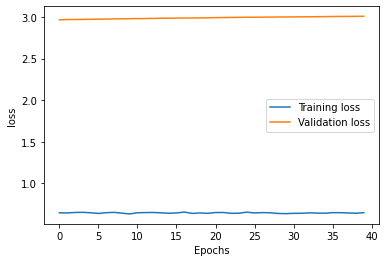

In [26]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()